In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('rainfall.csv')

print("Data Types:")
print(df.dtypes)

Data Types:
date                  object
rainfall             float64
temperature          float64
humidity             float64
wind_speed           float64
weather_condition     object
dtype: object


In [5]:
print(df.isnull().sum())


date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64


In [6]:
df = df.dropna()


In [7]:
from sklearn.impute import SimpleImputer

#Separate numerical and categorical columns
numerical_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed']
categorical_columns = ['weather_condition']

#Impute numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

#Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])


In [8]:
print(df.isnull().sum())


date                 0
rainfall             0
temperature          0
humidity             0
wind_speed           0
weather_condition    0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

#KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)


In [10]:
print(df.describe())


        rainfall  temperature   humidity  wind_speed    cluster
count  53.000000    53.000000  53.000000   53.000000  53.000000
mean    9.049057    17.950943  69.245283    6.403774   1.056604
std     6.712521     2.500663  11.969361    2.209069   0.886113
min     0.000000    13.900000  44.000000    2.100000   0.000000
25%     3.900000    16.100000  62.000000    4.700000   0.000000
50%     8.300000    17.800000  72.000000    6.700000   1.000000
75%    14.800000    19.400000  78.000000    8.300000   2.000000
max    21.800000    23.400000  89.000000   10.500000   2.000000


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['rainfall', 'temperature', 'humidity', 'wind_speed']])


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)


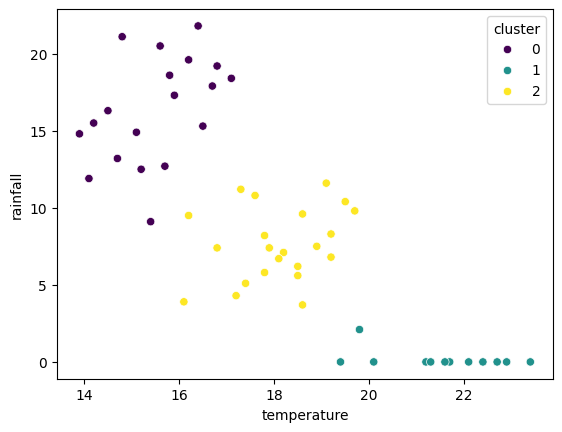

In [13]:
sns.scatterplot(data=df, x='temperature', y='rainfall', hue='cluster', palette='viridis')
plt.show()


In [14]:
X = df[['temperature', 'humidity']]
y = df['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 18.37
R-squared (R²): 0.48


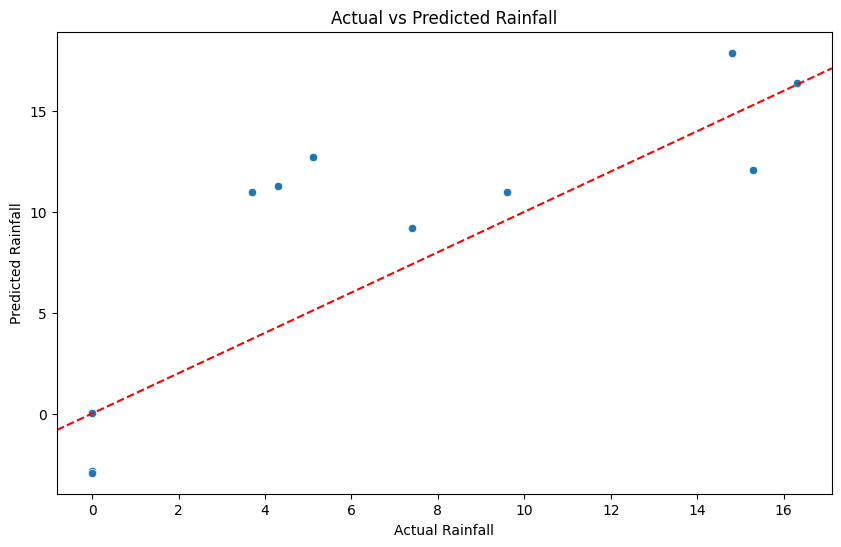

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.axline([0, 0], slope=1, color="red", linestyle="--")
plt.show()

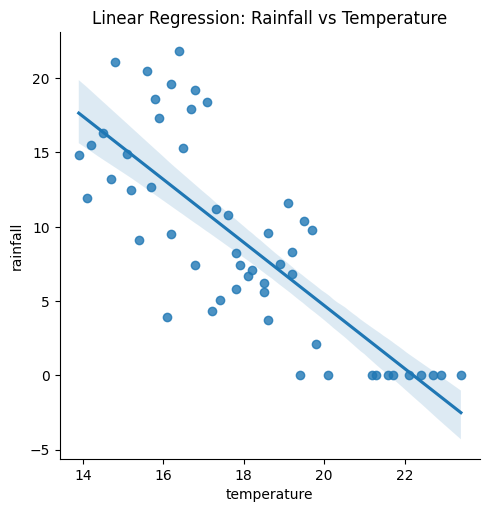

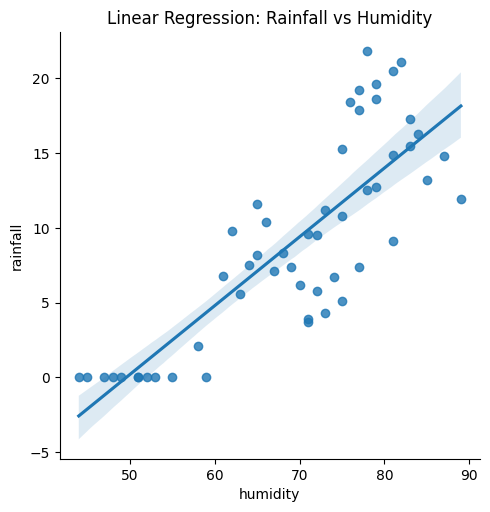

In [23]:
sns.lmplot(x='temperature', y='rainfall', data=df)
plt.title('Linear Regression: Rainfall vs Temperature')
plt.show()

sns.lmplot(x='humidity', y='rainfall', data=df)
plt.title('Linear Regression: Rainfall vs Humidity')
plt.show()